<a href="https://colab.research.google.com/github/Bao3333/MachineLearning/blob/main/Transferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 將檔案從掛載的雲端中讀取出來並且解壓縮
import zipfile
path = "/content/drive/MyDrive/Tibame_ai工程師班/深度學習/train.zip"
f = zipfile.ZipFile(path)
f.extractall()

['train/dog.10334.jpg', 'train/dog.3435.jpg', 'train/dog.12211.jpg', 'train/cat.9864.jpg', 'train/dog.3622.jpg', 'train/dog.3174.jpg', 'train/cat.10936.jpg', 'train/cat.2607.jpg', 'train/dog.11005.jpg', 'train/cat.794.jpg', 'train/cat.11400.jpg', 'train/dog.9694.jpg', 'train/cat.2506.jpg', 'train/dog.1875.jpg', 'train/dog.1847.jpg', 'train/cat.1678.jpg', 'train/dog.4781.jpg', 'train/dog.2869.jpg', 'train/cat.312.jpg', 'train/cat.388.jpg', 'train/cat.8556.jpg', 'train/cat.11509.jpg', 'train/dog.2752.jpg', 'train/cat.1112.jpg', 'train/dog.7354.jpg', 'train/dog.1317.jpg', 'train/cat.353.jpg', 'train/dog.4891.jpg', 'train/dog.8527.jpg', 'train/dog.1952.jpg', 'train/dog.2678.jpg', 'train/dog.685.jpg', 'train/dog.691.jpg', 'train/dog.794.jpg', 'train/cat.9512.jpg', 'train/cat.6424.jpg', 'train/cat.2289.jpg', 'train/cat.7523.jpg', 'train/dog.1910.jpg', 'train/cat.1782.jpg', 'train/dog.5903.jpg', 'train/dog.4441.jpg', 'train/dog.4613.jpg', 'train/dog.3114.jpg', 'train/dog.1739.jpg', 'train/dog

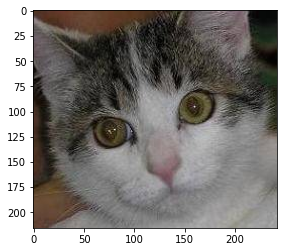

In [ ]:
# 看一下圖片
import matplotlib.pyplot as plt
import glob
import cv2
import random

file_path = glob.glob("train/*")
idx = random.randint(0, len(file_path))
img = cv2.imread(file_path[idx])
# opencv是讀BGR -> RGB
img = img[:, :, ::-1]
print(file_path)
plt.imshow(img)

In [ ]:
import pandas as pd
dogs = glob.glob("train/dog.*")
random.shuffle(dogs)
dogs # list of dogs paths
cats = glob.glob("train/cat.*")
random.shuffle(cats)
cats # list of cats paths

cls = ["dog", "cat"]
cls_map = {c:i for i,c in enumerate(cls)}
train = pd.DataFrame({"path":dogs[:500]+cats[:500], "target":[cls_map["dog"]]*500+[cls_map["cat"]]*500})
validate = pd.DataFrame({"path":dogs[500:550]+cats[500:550], "target":[cls_map["dog"]]*50+[cls_map["cat"]]*50})
test = pd.DataFrame({"path":dogs[550:600]+cats[550:600], "target":[cls_map["dog"]]*50+[cls_map["cat"]]*50})


In [ ]:
# 讀出vgg16的模型
from tensorflow.keras.applications.vgg16 import VGG16
#            ↓要不要用vgg16的分類器 ↓不要的話就要設定輸入的尺寸
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dense

# 凍結vgg16的參數
for l in vgg.layers:
  l.trainable=False

# 設定自己要的分類器
layers = [
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Dense(2, activation="softmax")
]
# 將vgg16的層和我們要的分類器做結合
layers = vgg.layers + layers
model = Sequential(layers)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
# 設定好層後就compile一下
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

In [ ]:
# 處理訓練資料
import numpy as np
# 一張照片的示範
from tensorflow.keras.applications.vgg16 import preprocess_input


# 隨便抓一張
path = glob.glob("train/*")[20]
# 用opencv讀出來
img = cv2.imread(path)
# BGR轉RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 調整一下尺寸
img = cv2.resize(img, (224, 224))
# 用vgg16的資料預處理方式(import過來就可以使用)
img = preprocess_input(img)
# 處理好後轉成array
img_np = np.array(img)
print(img_np)

[[[ -93.939    -108.779    -109.68    ]
  [ -91.939    -106.779    -107.68    ]
  [ -90.939    -105.779    -106.68    ]
  ...
  [  56.060997   46.221      43.32    ]
  [  55.060997   46.221      43.32    ]
  [  55.060997   46.221      44.32    ]]

 [[ -91.939    -106.779    -108.68    ]
  [ -92.939    -107.779    -108.68    ]
  [ -92.939    -107.779    -108.68    ]
  ...
  [  54.060997   44.221      41.32    ]
  [  54.060997   45.221      42.32    ]
  [  55.060997   46.221      44.32    ]]

 [[ -90.939    -105.779    -106.68    ]
  [ -93.939    -108.779    -109.68    ]
  [ -94.939    -109.779    -110.68    ]
  ...
  [  54.060997   44.221      42.32    ]
  [  54.060997   45.221      42.32    ]
  [  54.060997   46.221      44.32    ]]

 ...

 [[  44.060997   20.221      10.32    ]
  [  47.060997   22.221      13.32    ]
  [  47.060997   22.221      13.32    ]
  ...
  [ -80.939     -95.779     -86.68    ]
  [ -89.939    -106.779     -97.68    ]
  [ -78.939     -95.779     -90.68    ]]

 [

In [ ]:
# 要來批量處理
x_train = np.array(train["path"])  # -> 1000個train檔名的list
y_train = np.array(train["target"]) # -> 1000個train答案的list
x_validate = np.array(validate["path"]) # -> 50個validate檔名的list
y_validate = np.array(validate["target"]) # -> 50個validate的答案的list
x_test = np.array(test["path"]) # -> 50個test檔名的list
y_test = np.array(test["target"]) # -> 50個test的答案的list

In [ ]:
# 寫一個處理資料的function

# 需要帶入x, y, batch(預設為None)
def get_data(x, y, batch=None):
  # 如果有帶batch(不是None的話))那就會隨機拿出batch數量組的資料
  # 沒帶就全拿
  if batch is not None:
    idx = np.random.randint(0, len(x), size=batch)
    x, y = x[idx], y[idx]
  
  # 建立兩個list, 一個放處理過的, 一個放沒處理過的
  img_pre, img_ori = [], []

  # 走過每個path, 並進行處理(參考上方針對一張圖的處理)
  for p in x:
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img_np = np.array(img)
    #處理好後將預處理與沒預處理的分別放入list中
    img_pre.append(preprocess_input(img_np))
    img_ori.append(img_np)
  
  # 回傳 預處理的圖片矩陣, 沒處理的圖片矩陣, 答案
  return (np.array(img_pre), np.array(img_ori), y)

In [ ]:
# 將validate的資料讀出來
xv, xv_ori, yv = get_data(x_validate, y_validate)

In [ ]:
# 將test的資料讀出來
xt, xt_ori, yt = get_data(x_test, y_test)

In [ ]:
# 處理好資料後就來fit一下
# fit會需要一次把檔案都讀出來, 在實際情況中ram會爆開, 所以需要分批讀取進行fit
# 用train_on_batch, test_on_batch來一步一步訓練

# 使用for loop來進行訓練 
for i in range(50):
  #            ↑這邊是epchos
  #                                      ↓這邊是batch_size
  xt, _, yt = get_data(x_train, y_train, batch=20)
  # fit完會回傳loss, accuracy
  result = model.train_on_batch(xt, yt)
  print("train", result)
  # 每次fit後就validate一次(batch不帶就是全拿, 詳見上方function)
  result = model.test_on_batch(xv, yv)
  print("validate", result)

  print("-"*20, "第", i+1, "次", "-"*20)

train [0.22174744307994843, 0.949999988079071]
validate [0.18458643555641174, 0.949999988079071]
-------------------- 第 1 次 --------------------
train [0.25708216428756714, 0.949999988079071]
validate [0.18351875245571136, 0.949999988079071]
-------------------- 第 2 次 --------------------
train [0.23602215945720673, 0.949999988079071]
validate [0.18132515251636505, 0.949999988079071]
-------------------- 第 3 次 --------------------
train [0.26382941007614136, 0.8999999761581421]
validate [0.1790044903755188, 0.949999988079071]
-------------------- 第 4 次 --------------------
train [0.23891107738018036, 1.0]
validate [0.1773560345172882, 0.9599999785423279]
-------------------- 第 5 次 --------------------
train [0.31094464659690857, 0.8500000238418579]
validate [0.1755072921514511, 0.9599999785423279]
-------------------- 第 6 次 --------------------
train [0.24589014053344727, 1.0]
validate [0.1743164211511612, 0.9599999785423279]
-------------------- 第 7 次 --------------------
train [0.222

In [ ]:
x, x_ori, y = get_data(x_train, y_train, 10)
model.predict(x)

array([[9.94739354e-01, 5.26060257e-03],
       [1.06970817e-01, 8.93029153e-01],
       [2.63477452e-02, 9.73652244e-01],
       [2.42424514e-02, 9.75757539e-01],
       [9.23922539e-01, 7.60774761e-02],
       [9.95039880e-01, 4.96018352e-03],
       [9.97914970e-01, 2.08502333e-03],
       [1.15693755e-01, 8.84306252e-01],
       [9.99871612e-01, 1.28333413e-04],
       [9.98241544e-01, 1.75844715e-03]], dtype=float32)

In [ ]:
# 因為是手動批次訓練所以沒有Earlystopping, 要的話應該可以自己寫
# 可以多按幾次訓練到自己想要的程度
# 然後就來evaluate一下

#每組答案都會是貓跟狗的分別機率,所以要取最高的
pre = model.predict(xt).argmax(axis=-1)

model.evaluate(xt, yt)

1/1 [==============================] - 0s 269ms/step - loss: 0.0855 - accuracy: 1.0000


[0.08547677099704742, 1.0]

In [ ]:
# 找出預測錯誤的圖
idx = np.nonzero(pre != yt)[0]
idx = idx[:200]
pre_false_label = yt[idx]
pre_false_pre = pre[idx]
pre_false_img = xt_ori[idx]
# !
trans = ["dog", "cat"]
plt.figure(figsize=(15, 5))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(trans[pre_false_label[i]], trans[pre_false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(pre_false_img[i])

請輸入圖片網址:https://ichef.bbci.co.uk/news/976/cpsprodpb/C17B/production/_126313594_gettyimages-1217576289.jpg
dog 的機率: 0.027
cat 的機率: 0.973


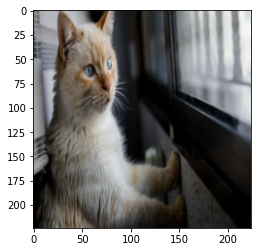

In [ ]:
# 抓張網路上的圖片來看看

import requests
url = input("請輸入圖片網址:")
response = requests.get(url, stream=True)
img = Image.open(response.raw).convert("RGB").resize((224, 224))
img_np = np.array(img).reshape(1, 224, 224, 3)
img_np_pre = preprocess_input(img_np)
proba = model.predict(img_np_pre)[0]
for p, n in zip(proba, trans):
   print(n, "的機率:", round(p, 3))
plt.imshow(img)